<a href="https://colab.research.google.com/github/bharti0420/data_analysis_work/blob/master/forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series forecasting
* Forecasting of Raw Conc. on July,2018

In [0]:
import pandas as pd
import numpy as np
from datetime import *
import csv
from matplotlib import pyplot as plt
import matplotlib.pyplot as plot
from google.colab import files
import io
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import calendar

%matplotlib inline

In [0]:
!pip install scipy
!pip install -U statsmodels


In [0]:
!pip install statsmodels==0.9.0rc1

In [0]:
!pip install statsmodels

In [0]:
uploaded=files.upload()

Saving NewDelhi_PM2.5_2018_YTD.csv to NewDelhi_PM2.5_2018_YTD.csv


In [0]:
def edit(fn):
  with open(fn,'r') as fin, open('fout.csv','w',newline='') as fout:
    reader=csv.reader(fin,skipinitialspace=True)
    writer=csv.writer(fout,delimiter=',')
    writer.writerow(next(reader))
    
    for i in reader:
      if float(i[-4]) < 500 and  float(i[-4])>=0:
        writer.writerow(i)
      else:
        i[-4]=0
        writer.writerow(i)
  df_data=pd.read_csv('fout.csv')
  df_data.rename(columns={'Date (LT)': 'date'},inplace=True)
  df_data['date'] = pd.to_datetime(df_data['date'])
  #print(type(df_data['date']))
  df_data['Raw Conc.'] = df_data['Raw Conc.'].replace(0,np.nan, regex=True)
  df_data['Raw Conc.'] = df_data['Raw Conc.'].fillna('')
  #df_data['date'] = df_data['date'].dt.month
  file_name="fore_"+fn
  df_data.to_csv(file_name)
  #files.download(file_name)

In [0]:
for fn in uploaded.keys():
  edit(fn)

In [0]:
uploaded=files.upload()

Saving fore_NewDelhi_PM2.5_2018_YTD.csv to fore_NewDelhi_PM2.5_2018_YTD (1).csv


In [0]:
def plot_data(file_name):
  df=pd.read_csv(file_name)
  print(type(df.date))
  df['date']=pd.to_datetime(df['date'])
  df = df.set_index('date') 
  ax=plt.plot(df['Raw Conc.'])
  #ax.xaxis.grid(True, which="minor")
  plt.gcf().set_size_inches(15,9)
  plt.show()

In [0]:
for fn in uploaded.keys():
  plot_data(fn)

In [0]:
4344 5089

In [0]:
uploaded=files.upload()

Saving fore_NewDelhi_PM2.5_2018_YTD.csv to fore_NewDelhi_PM2.5_2018_YTD (2).csv


In [0]:
def subsetting_dataset(file_name):
  df=pd.read_csv(file_name,nrows=5089)
 
  #creating given and test set
  #index 4344 marks the end of september 2018
  
  given=df[0:4344]
  
  test=df[4344:]
  
  #Aggregating the dataset at daily level
  df.timestamp = pd.to_datetime(df.date,format='%Y/%m/%d %H:%M')
  
  df.index=df.timestamp
  df=df.resample('D').mean()
  """['Raw Conc.'].plot(figsize=(15,8), title="Daily Raw Conc", fontsize=18)
  plt.show()
  plt.close('all')
  """
  given.timestamp = pd.to_datetime(given.date,format='%Y/%m/%d %H:%M')
  given.index=given.timestamp
  given=given.resample('D').mean()
  #given.to_csv("daily_mean.csv")
  #files.download("daily_mean.csv")
  
  test.timestamp=pd.to_datetime(test.date,format='%Y/%m/%d %H:%M')
  test.index=test.timestamp
  test=test.resample('D').mean()
  
  given['Raw Conc.'].plot(figsize=(15,8), title="Daily Raw Conc", fontsize=18,color='red')
  test['Raw Conc.'].plot(figsize=(15,8), title="Daily Raw Conc", fontsize=18)
  plt.legend()
  plt.show()
  plt.close('all')
  
  # first approach  Naive method  "Y(t+1)=Yt"
  dd=np.asarray(given['Raw Conc.'])
  y_naive=test.copy()
  y_naive['naive']=dd[len(dd)-1]
  print("predicted Raw Conc. on July,2018\n")
  print(y_naive['naive'])
  plt.figure(figsize=(12,8))
  plt.plot(given.index,given['Raw Conc.'],label='given')
  plt.plot(test.index,test['Raw Conc.'],label='test')
  plt.plot(y_naive.index,y_naive['naive'],label='naive forecast')
  plt.legend(loc='best')
  plt.title("Method 1: Naive Forecast ",fontsize=20,color='gray')
  plt.show()
  plt.close('all')
  
  #Now calculate RMSE(Root Mean Squared Log Error)  to check to accuracy of our model on test data set. 
  from sklearn.metrics import mean_squared_error
  from math import sqrt
  rms=sqrt(mean_squared_error(test['Raw Conc.'],y_naive['naive']))
  print('RMSE Error= %.5f \n\n'% rms)
  
  
  # Method 2: Simple Average  
  y_avg=test.copy()
  y_avg['avg_forecast']=given['Raw Conc.'].mean()
  print("predicted Raw Conc. on July,2018\n")
  print(y_avg['avg_forecast'])
  plt.figure(figsize=(12,8))
  plt.plot(given.index,given['Raw Conc.'],label='Given Raw Conc')
  plt.plot(test.index,test['Raw Conc.'],label='test Raw Conc')
  plt.plot(y_avg.index,y_avg['avg_forecast'],label='average forecast')
  plt.title("Method 2: Simple Average ",fontsize=20,color='gray')
  plt.legend(loc='best')
  plt.show()
  plt.close('all')
  #Now calculate RMSE(Root Mean Squared Log Error) 
  rms=sqrt(mean_squared_error(test['Raw Conc.'],y_avg['avg_forecast']))
  print('RMSE Error= %.5f \n\n'% rms)
  
  
  #method 3- Moving Average
  y_mov_avg=test.copy()
  y_mov_avg['moving_avg_forecast']=given['Raw Conc.'].rolling(5).mean().iloc[-1]
  plt.figure(figsize=(12,8))
  plt.plot(given.index,given['Raw Conc.'],label='Given Raw Conc')
  plt.plot(test.index,test['Raw Conc.'],label='test Raw Conc')
  plt.plot(y_mov_avg.index,y_mov_avg['moving_avg_forecast'],label='moving average forecast')
  plt.title("Method 3: Moving Average ",fontsize=20,color='gray')
  plt.legend(loc='best')
  plt.show()
  plt.close('all')
  #Now calculate RMSE(Root Mean Squared Log Error) 
  print("predicted Raw Conc. on July,2018\n")
  print(y_mov_avg['moving_avg_forecast'])
  rms=sqrt(mean_squared_error(test['Raw Conc.'],y_mov_avg['moving_avg_forecast']))
  print('RMSE Error= %.5f \n\n'% rms)
  
  
 
  #Method 4 – Simple Exponential Smoothing
  from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing, Holt
  """y_exp = test.copy()
  fit2 = SimpleExpSmoothing(dd).fit(smoothing_level=0.6,optimized=False)
  y_exp['SES'] = fit2.forecast(len(test))
  plt.figure(figsize=(16,8))
  plt.plot(given.index,given['Raw Conc.'], label='given Raw Conc.')
  plt.plot(test.index,test['Raw Conc.'], label='Test Raw Conc.')
  plt.plot(y_exp.index,y_exp['SES'], label='SES')
  plt.legend(loc='best')
  plt.show()
  plt.close('all')
  #Now calculate RMSE(Root Mean Squared Log Error) 
  rms = sqrt(mean_squared_error(test['Raw Conc.'], y_exp.SES))
  print('RMSE Error= %.5f \n\n'% rms)
  """
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


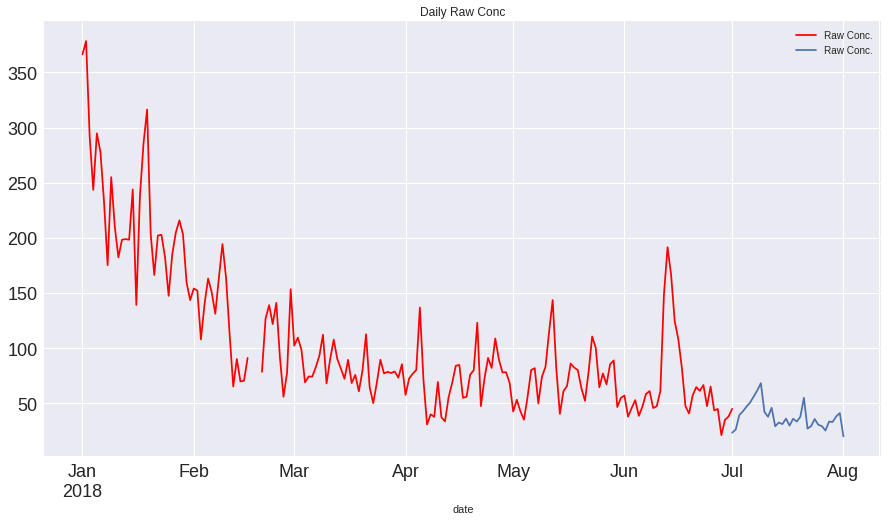

predicted Raw Conc. on July,2018

date
2018-07-01    45.0
2018-07-02    45.0
2018-07-03    45.0
2018-07-04    45.0
2018-07-05    45.0
2018-07-06    45.0
2018-07-07    45.0
2018-07-08    45.0
2018-07-09    45.0
2018-07-10    45.0
2018-07-11    45.0
2018-07-12    45.0
2018-07-13    45.0
2018-07-14    45.0
2018-07-15    45.0
2018-07-16    45.0
2018-07-17    45.0
2018-07-18    45.0
2018-07-19    45.0
2018-07-20    45.0
2018-07-21    45.0
2018-07-22    45.0
2018-07-23    45.0
2018-07-24    45.0
2018-07-25    45.0
2018-07-26    45.0
2018-07-27    45.0
2018-07-28    45.0
2018-07-29    45.0
2018-07-30    45.0
2018-07-31    45.0
2018-08-01    45.0
Freq: D, Name: naive, dtype: float64


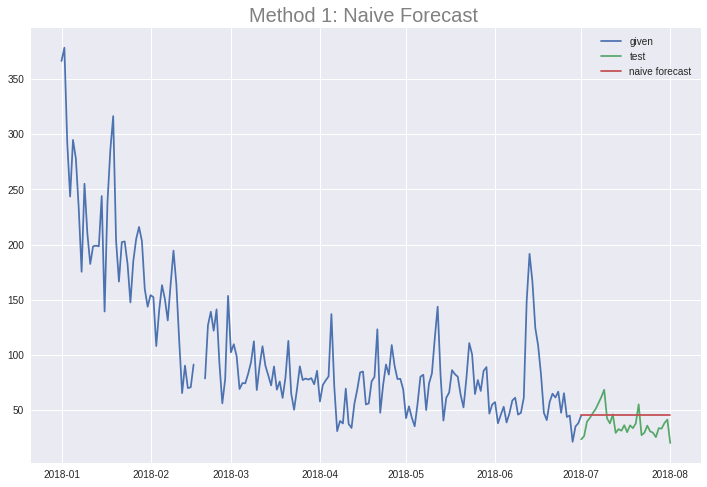

RMSE Error= 13.24908 


predicted Raw Conc. on July,2018

date
2018-07-01    105.867382
2018-07-02    105.867382
2018-07-03    105.867382
2018-07-04    105.867382
2018-07-05    105.867382
2018-07-06    105.867382
2018-07-07    105.867382
2018-07-08    105.867382
2018-07-09    105.867382
2018-07-10    105.867382
2018-07-11    105.867382
2018-07-12    105.867382
2018-07-13    105.867382
2018-07-14    105.867382
2018-07-15    105.867382
2018-07-16    105.867382
2018-07-17    105.867382
2018-07-18    105.867382
2018-07-19    105.867382
2018-07-20    105.867382
2018-07-21    105.867382
2018-07-22    105.867382
2018-07-23    105.867382
2018-07-24    105.867382
2018-07-25    105.867382
2018-07-26    105.867382
2018-07-27    105.867382
2018-07-28    105.867382
2018-07-29    105.867382
2018-07-30    105.867382
2018-07-31    105.867382
2018-08-01    105.867382
Freq: D, Name: avg_forecast, dtype: float64


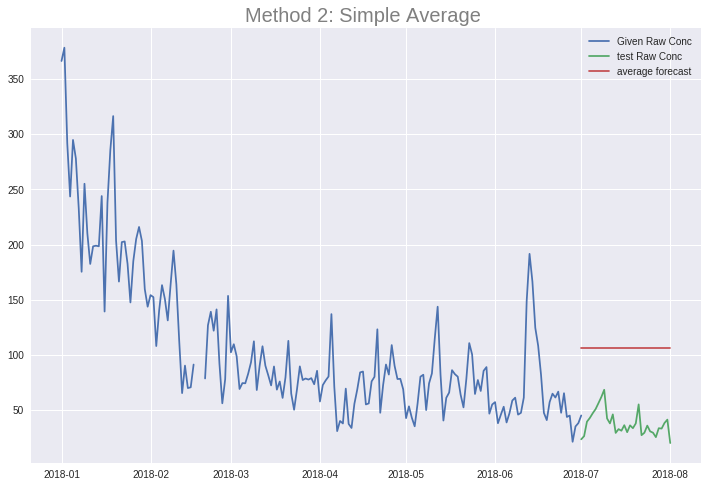

RMSE Error= 69.05466 




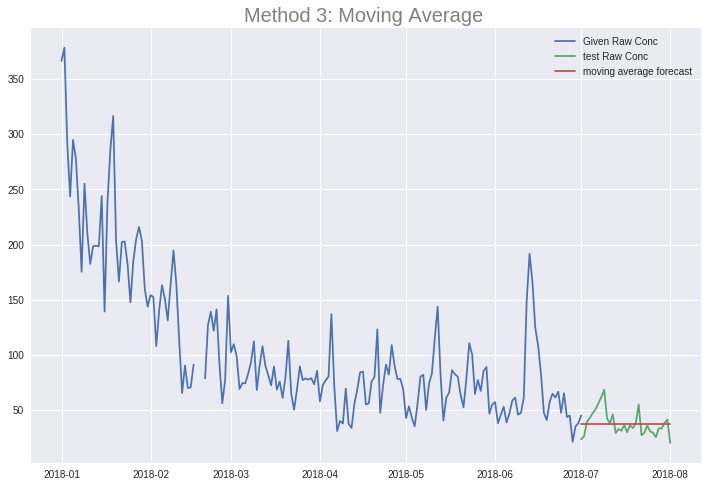

predicted Raw Conc. on July,2018

date
2018-07-01    36.825
2018-07-02    36.825
2018-07-03    36.825
2018-07-04    36.825
2018-07-05    36.825
2018-07-06    36.825
2018-07-07    36.825
2018-07-08    36.825
2018-07-09    36.825
2018-07-10    36.825
2018-07-11    36.825
2018-07-12    36.825
2018-07-13    36.825
2018-07-14    36.825
2018-07-15    36.825
2018-07-16    36.825
2018-07-17    36.825
2018-07-18    36.825
2018-07-19    36.825
2018-07-20    36.825
2018-07-21    36.825
2018-07-22    36.825
2018-07-23    36.825
2018-07-24    36.825
2018-07-25    36.825
2018-07-26    36.825
2018-07-27    36.825
2018-07-28    36.825
2018-07-29    36.825
2018-07-30    36.825
2018-07-31    36.825
2018-08-01    36.825
Freq: D, Name: moving_avg_forecast, dtype: float64
RMSE Error= 11.09415 




In [0]:
for fn in uploaded.keys():
  subsetting_dataset(fn)